In [2]:
pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import re, itertools
import networkx as nx
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
# load the text book in from file
with open('Alice.txt', 'r', encoding='utf8') as rf:
    text = rf.read()

In [3]:
text = text[text.find("CHAPTER I.")+len("CHAPTER I."):text.find("END OF THE PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND")].strip()

In [10]:
#Split the text into chapter and paragraph
Chapters = re.split(r"CHAPTER \d{1,2}", text)

#Split Paragraph
Paragraphs = text.split("\n")


In [11]:
#Load and read Charectors
with open('charecters.txt', 'r', encoding= 'utf8') as rf:
    Charectors = rf.read().split("\n")
    Charectors = [Charectors.split(", ") for Charectors in Charectors]

In [12]:
print(Charectors)

[['Alice'], ['The White Rabbit', 'White Rabbit'], ['The Mouse', 'the Mouse'], ['The Dodo', 'the Dodo'], ['The Lory', 'the Lory'], ['The Eaglet', 'the Eaglet'], ['The Duck', 'the Duck'], ['Pat'], ['the Lizard', 'Bill'], ['Puppy', 'the puppy'], ['The Caterpillar', 'Caterpillar'], ['The Duchess', 'Duchess'], ['The Cheshire Cat', 'Cheshire Cat'], ['The Hatter', 'Hatter'], ['The March Hare', 'March Hare'], ['The Dormouse', 'Dormouse'], ['The Queen', 'the Queen'], ['The King', 'the King'], ['The Knave', 'the Knave'], ['The Gryphon', 'Gryphon'], ['The Mock Turtle', 'Mock Turtle']]


In [13]:
#Edge Information
Charector_in_dic = dict()


for chapter in Paragraphs:
    observe = []
    for charactor in Charectors:
        for name in charactor:
            if name in chapter:
                observe.append(charactor[0])
                break
    relationship = itertools.combinations(sorted(observe),2)
    for relation in relationship:
        if relation in Charector_in_dic:
            Charector_in_dic[relation] += 1
        else:
            Charector_in_dic[relation] = 1

In [14]:
print( Charector_in_dic)

{('Alice', 'The Duchess'): 5, ('Alice', 'The Mouse'): 3, ('Alice', 'The Dodo'): 1, ('Alice', 'the Lizard'): 1, ('Alice', 'The Caterpillar'): 2, ('The Dormouse', 'The Hatter'): 4, ('The Dormouse', 'The March Hare'): 3, ('The Hatter', 'The March Hare'): 4, ('Alice', 'The Dormouse'): 5, ('Alice', 'The Hatter'): 2, ('Alice', 'The March Hare'): 1, ('Alice', 'The Queen'): 7, ('Alice', 'The White Rabbit'): 2, ('The Knave', 'The Queen'): 1, ('The King', 'The Queen'): 3, ('Alice', 'The King'): 4, ('Alice', 'The Cheshire Cat'): 1, ('Alice', 'The Mock Turtle'): 3, ('The Mock Turtle', 'The Queen'): 1, ('Alice', 'The Gryphon'): 6, ('The Gryphon', 'The Queen'): 1, ('The Gryphon', 'The Mock Turtle'): 2, ('The King', 'The White Rabbit'): 3, ('The Hatter', 'The King'): 2, ('The Hatter', 'The Queen'): 2, ('The Dormouse', 'The Queen'): 1, ('The Queen', 'the Lizard'): 1}


In [15]:
#weigh
G = nx.Graph()

for charactor in Charectors:
    G.add_node(charactor[0])

for edge, weight in Charector_in_dic.items():
    G.add_edge(edge[0], edge[1], weight=weight)

print(G.edges().data())

[('Alice', 'The Duchess', {'weight': 5}), ('Alice', 'The Mouse', {'weight': 3}), ('Alice', 'The Dodo', {'weight': 1}), ('Alice', 'the Lizard', {'weight': 1}), ('Alice', 'The Caterpillar', {'weight': 2}), ('Alice', 'The Dormouse', {'weight': 5}), ('Alice', 'The Hatter', {'weight': 2}), ('Alice', 'The March Hare', {'weight': 1}), ('Alice', 'The Queen', {'weight': 7}), ('Alice', 'The White Rabbit', {'weight': 2}), ('Alice', 'The King', {'weight': 4}), ('Alice', 'The Cheshire Cat', {'weight': 1}), ('Alice', 'The Mock Turtle', {'weight': 3}), ('Alice', 'The Gryphon', {'weight': 6}), ('The White Rabbit', 'The King', {'weight': 3}), ('the Lizard', 'The Queen', {'weight': 1}), ('The Hatter', 'The Dormouse', {'weight': 4}), ('The Hatter', 'The March Hare', {'weight': 4}), ('The Hatter', 'The King', {'weight': 2}), ('The Hatter', 'The Queen', {'weight': 2}), ('The March Hare', 'The Dormouse', {'weight': 3}), ('The Dormouse', 'The Queen', {'weight': 1}), ('The Queen', 'The Knave', {'weight': 1}),

NameError: name 'pos' is not defined

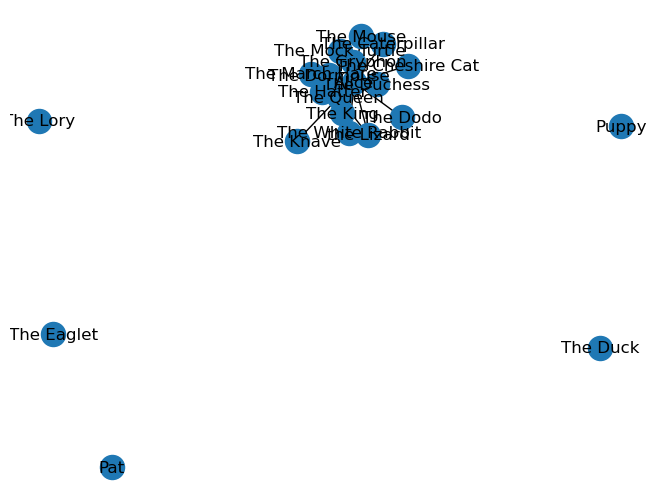

In [16]:
#plot
nx.draw(G,with_labels=True)
nx.draw_networkx_edges(G, pos=pos, width=1, alpha=0.5, edge_color='b')

plt.show()

In [ ]:

#Use circular layout

pos = nx.circular_layout(G)

# plot the graph
nx.draw(G, pos, with_labels=True, font_size=10, font_weight="bold")
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()


In [ ]:

#remove Isolated node
isolates = list(nx.isolates(G))
G.remove_nodes_from(isolates)

pos = nx.circular_layout(G)

# plot the graph
nx.draw(G, pos, with_labels=True, font_size=10, font_weight="bold")
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()


TypeError: draw_networkx_edge_labels() got an unexpected keyword argument 'edge_attr'

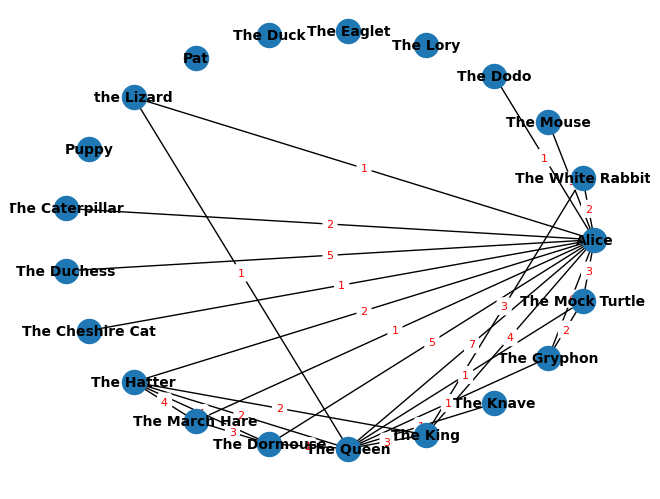

In [17]:
pos = nx.circular_layout(G)

# plot the graph
nx.draw(G, pos, with_labels=True, font_size=10, font_weight="bold")
labels = nx.get_edge_attributes(G, "weight")
edge_labels = nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8, font_color='r')

# adjust the positions of edge labels
for _, t in edge_labels.items():
    t.set_rotation('horizontal')
    t.set_ha('center')
    t.set_va('center')

# draw curved edges
for u, v, d in G.edges(data=True):
    c = (pos[u] + pos[v]) / 2
    dist = np.sqrt((pos[u][0] - pos[v][0])**2 + (pos[u][1] - pos[v][1])**2)
    rad = dist / 2
    x, y = c[0] - rad, c[1] - rad
    width = d['weight'] / 5
    nx.draw_networkx_edge_labels(G, pos, edge_labels={ (u,v): d['weight'] }, 
                                 font_size=8, font_color='r', 
                                 label_pos=0.5, edge_attr={'alpha':0}, ax=plt.gca())
    nx.draw(G, pos, edgelist=[(u,v)], width=width, edge_color='k', style='solid', 
            alpha=0.3, ax=plt.gca(), with_labels=False, node_size=1)
    
plt.show()


In [20]:
# Create a dictionary with character names as keys and degrees as values
freq = {}
for char in Charectors:
    char_str = ", ".join(char)  # convert list to string
    freq[char_str] = degrees[char_str]

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


KeyError: 'The White Rabbit, White Rabbit'